Nympy en Cálculo Numérico
=========================

El cálculo numérico es uno de los campos donde el uso de funciones de matrices y la librería NumPy es absolutamente fundamental y transformador en Python.

En el cálculo numérico no se trabaja con fórmulas simbólicas (como f(x) = x^2), sino con aproximaciones numéricas utilizando conjuntos de puntos. Aquí, una función se representa como un arreglo de valores. NumPy es la herramienta perfecta para esto, ya que permite aplicar operaciones matemáticas a todos estos puntos de forma simultánea y eficiente.

Algunos ejemplos prácticos de las áreas más importantes del cálculo numérico son:


**<p style="font-size:18px; color:auto;">Ejemplo 1: Derivadas Numéricas</p>**

**Problema:** Tienes una función y quieres encontrar su derivada (la pendiente o tasa de cambio) en cada punto, pero sin resolverla analíticamente.

**Lógica Numérica:** Se utiliza el método de las "diferencias finitas". La derivada f'(x) se puede aproximar como (f(x+h) - f(x)) / h para un h muy pequeño. Con un arreglo de puntos, esto se traduce en calcular la diferencia entre valores consecutivos. La función np.diff() de NumPy es perfecta para esto.

Calculando la derivada de sin(x) numéricamente...


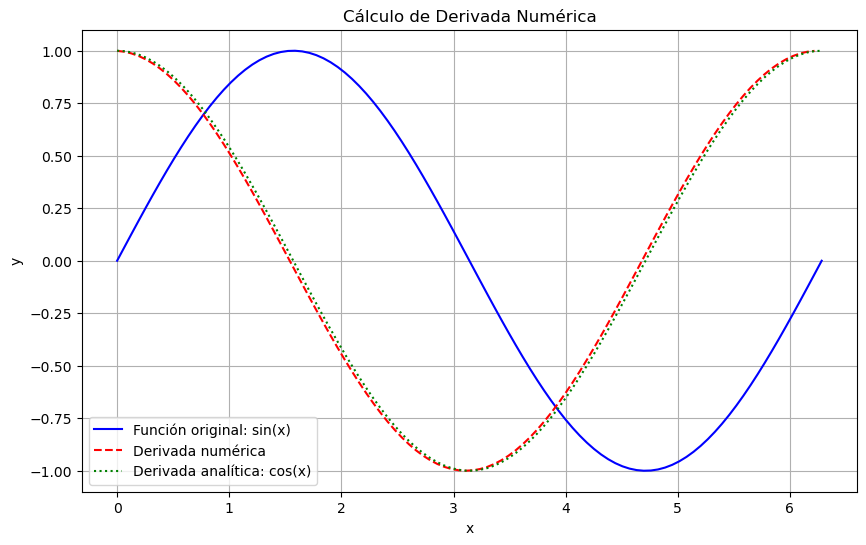

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Representamos la función f(x) = sin(x) en el intervalo [0, 2*pi]
# Creamos 100 puntos para 'x' y sus correspondientes valores 'y'
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# 2. Calculamos la derivada numéricamente
# np.diff(y) calcula la diferencia entre cada elemento consecutivo (y[i+1] - y[i])
# np.diff(x) calcula la diferencia entre los 'x' (el valor de 'h')
derivada = np.diff(y) / np.diff(x)

# 3. El arreglo de la derivada tiene un elemento menos, así que ajustamos 'x' para graficar
x_derivada = x[:-1]

# La derivada de sin(x) es cos(x). Vamos a comparar gráficamente.
print("Calculando la derivada de sin(x) numéricamente...")

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Función original: sin(x)', color='blue')
plt.plot(x_derivada, derivada, label='Derivada numérica', color='red', linestyle='--')
plt.plot(x, np.cos(x), label='Derivada analítica: cos(x)', color='green', linestyle=':')
plt.title("Cálculo de Derivada Numérica")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

**Ventaja Práctica:** En lugar de un bucle manual, np.diff() calcula todas las diferencias en un solo paso optimizado. Esto permite analizar la tasa de cambio de cualquier conjunto de datos (ej. la velocidad a partir de datos de posición y tiempo) de forma muy eficiente.

**<p style="font-size:18px; color:auto;">Ejemplo 2: Integración Numérica (Área bajo la Curva)</p>**

**Problema:** Quieres calcular el área bajo la curva de una función en un intervalo determinado (la integral definida), lo cual es crucial en campos como la física y la estadística.

**Lógica Numérica:** Se divide el área en muchas formas geométricas pequeñas (como trapecios) y se suman sus áreas. Esto se conoce como la "regla del trapecio".

In [2]:
import numpy as np

# Queremos integrar f(x) = x^2 desde x=0 hasta x=5
# La solución analítica es (x^3)/3, que para x=5 es 125/3 ≈ 41.67

# 1. Creamos los puntos de nuestra función
x = np.linspace(0, 5, 1000) # Usamos más puntos para mayor precisión
y = x**2

# 2. NumPy tiene una función optimizada para la regla del trapecio: np.trapz()
area_calculada = np.trapz(y, x)

print("--- Integración Numérica ---")
print(f"El área bajo la curva de x^2 desde 0 a 5 es:")
print(f"Resultado Numérico: {area_calculada:.4f}")
print(f"Resultado Analítico: {125/3:.4f}")

--- Integración Numérica ---
El área bajo la curva de x^2 desde 0 a 5 es:
Resultado Numérico: 41.6667
Resultado Analítico: 41.6667


**Ventaja Práctica:** Funciones como np.trapz() encapsulan algoritmos numéricos complejos. Puedes calcular integrales de cualquier conjunto de datos (ej. el trabajo total realizado por una fuerza variable) sin necesidad de implementar la fórmula de la suma manualmente.

**<p style="font-size:18px; color:auto;">Ejemplo 3: Resolución de Ecuaciones Diferenciales Ordinarias (EDO)</p>**

**Problema:** Las EDOs modelan sistemas que cambian en el tiempo, como el crecimiento de una población, la desintegración radiactiva o un circuito eléctrico. Resolverlas significa encontrar el estado del sistema en cualquier momento.

**Lógica Numérica:** Se utilizan métodos iterativos (como Euler o Runge-Kutta) que empiezan en una condición inicial y calculan el estado en el siguiente paso de tiempo. Para esto, se suele usar la librería SciPy, que está construida sobre NumPy.


Resolviendo una Ecuación Diferencial para el crecimiento poblacional...


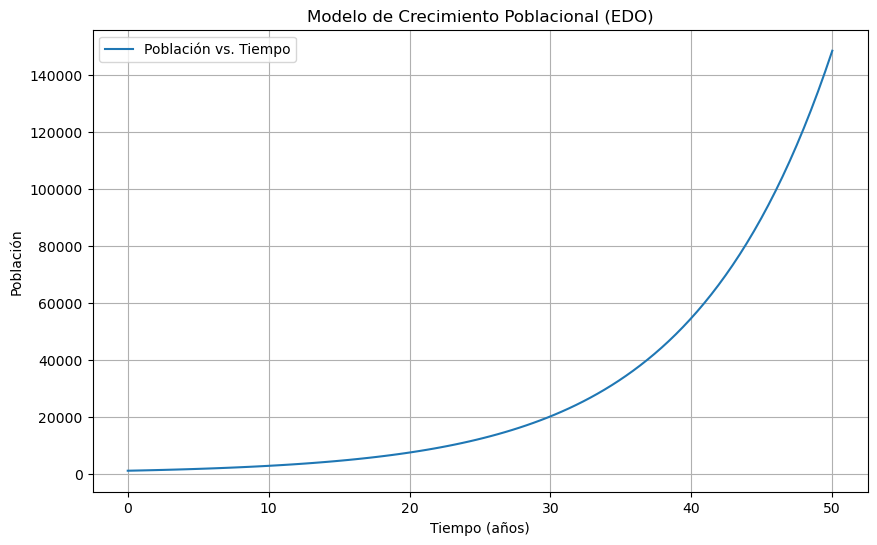

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Problema: Modelo de crecimiento poblacional simple
# dP/dt = r*P  (La tasa de cambio de la población es proporcional a la población)
# P es la población, t es el tiempo, r es la tasa de crecimiento.

def modelo_poblacion(t, P, r):
    return r * P

# Parámetros y condiciones iniciales
r = 0.1  # Tasa de crecimiento del 10%
P0 = [1000] # Población inicial de 1000
t_span = [0, 50] # Intervalo de tiempo: de 0 a 50 años
t_eval = np.linspace(t_span[0], t_span[1], 100) # Puntos para evaluar

# Resolver la EDO
solucion = solve_ivp(
    fun=modelo_poblacion,
    t_span=t_span,
    y0=P0,
    args=(r,),
    t_eval=t_eval
)

print("Resolviendo una Ecuación Diferencial para el crecimiento poblacional...")

plt.figure(figsize=(10, 6))
plt.plot(solucion.t, solucion.y[0], label='Población vs. Tiempo')
plt.title("Modelo de Crecimiento Poblacional (EDO)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Población")
plt.legend()
plt.grid(True)
plt.show()



**Ventaja Práctica:** El ecosistema científico de Python (NumPy + SciPy) proporciona solucionadores robustos y probados para problemas matemáticos muy complejos. Esto permite a los científicos e ingenieros modelar sistemas del mundo real sin tener que programar los algoritmos numéricos desde cero.